In [2]:
run readAcetone.py

Acetone/20220127_05_Acetone_Measurement_01_Tight_17O.txt
Acetone/20220127_06_Acetone_Measurement_02_Tight_17O.txt
Acetone/20220127_07_Acetone_Measurement_03_Tight_17O.txt
Acetone/20220127_08_Acetone_Measurement_04_Tight_17O.txt
Acetone/20220127_09_Acetone_Measurement_05_Tight_17O.txt
File 0 59 D/Unsub fails RSE/SN Test with value of 3.4582481046789297
File 1 59 D/Unsub fails RSE/SN Test with value of 2.401381469467877
File 2 59 D/Unsub fails RSE/SN Test with value of 2.4525701303890046
File 3 59 D/Unsub fails RSE/SN Test with value of 2.81340847695591
File 4 59 D/Unsub fails RSE/SN Test with value of 3.2810566589966483
20220127_08_Acetone_Measurement_04_Tight_17O.txt D 59 has 1 zero scans, out of 8210 scans (0.0001218026796589525)
20220127_09_Acetone_Measurement_05_Tight_17O.txt D 59 has 1 zero scans, out of 4371 scans (0.00022878059940517045)
20220127_05_Acetone_Measurement_01_Tight_17O.txt 17O 59 has 18 zero scans, out of 6822 scans (0.002638522427440633)
20220127_06_Acetone_Measurem

5it [00:05,  1.06s/it]
5it [00:05,  1.05s/it]
1it [00:01,  1.22s/it]

Failed Subsequence Detection 20220127_05_Acetone_Measurement_01_Tight_17O.txt 59 D with a value of 0.98


2it [00:02,  1.31s/it]

Failed Subsequence Detection 20220127_06_Acetone_Measurement_02_Tight_17O.txt 59 D with a value of 0.53


3it [00:03,  1.21s/it]

Failed Subsequence Detection 20220127_07_Acetone_Measurement_03_Tight_17O.txt 59 D with a value of 0.50


4it [00:05,  1.45s/it]

Failed Subsequence Detection 20220127_08_Acetone_Measurement_04_Tight_17O.txt 59 D with a value of 0.26


5it [00:06,  1.23s/it]


Failed Subsequence Detection 20220127_09_Acetone_Measurement_05_Tight_17O.txt 59 D with a value of 0.24


5it [00:07,  1.50s/it]
5it [00:06,  1.28s/it]
5it [00:00, ?it/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import seaborn as sns

cretTime = 0
cscanN = 0
newList = []
for merged in mergedList:
    cDf = merged[0].copy()
    
    cDf['retTime'] += cretTime
    cDf['scanNumber'] += cscanN
    
    cretTime = cDf['retTime'].max()
    cscanN = cDf['scanNumber'].max()
    
    newList.append(cDf)
    
fullDf = pd.concat(newList, ignore_index=True)

In [3]:
def subsequenceOutlierDetection(timeSeries, subsequenceLength = 1000):
    allDev = []
    for i in range(subsequenceLength,len(timeSeries)-subsequenceLength):
        thisSubsequence = timeSeries[i:i+subsequenceLength]
        thisPrediction = timeSeries[i-subsequenceLength:i].mean()
        sds = np.sqrt( ((thisSubsequence.values - thisPrediction)**2).sum())
        allDev.append(sds)

    return np.array(allDev)

100%|██████████| 100/100 [00:00<00:00, 1152.52it/s]


7.015390345329086e-05


100%|██████████| 100/100 [00:00<00:00, 1309.45it/s]


0.0008716121080848687


100%|██████████| 100/100 [00:00<00:00, 815.16it/s]


0.0002760622906485253


100%|██████████| 100/100 [00:00<00:00, 1237.37it/s]


0.0006560888168132305


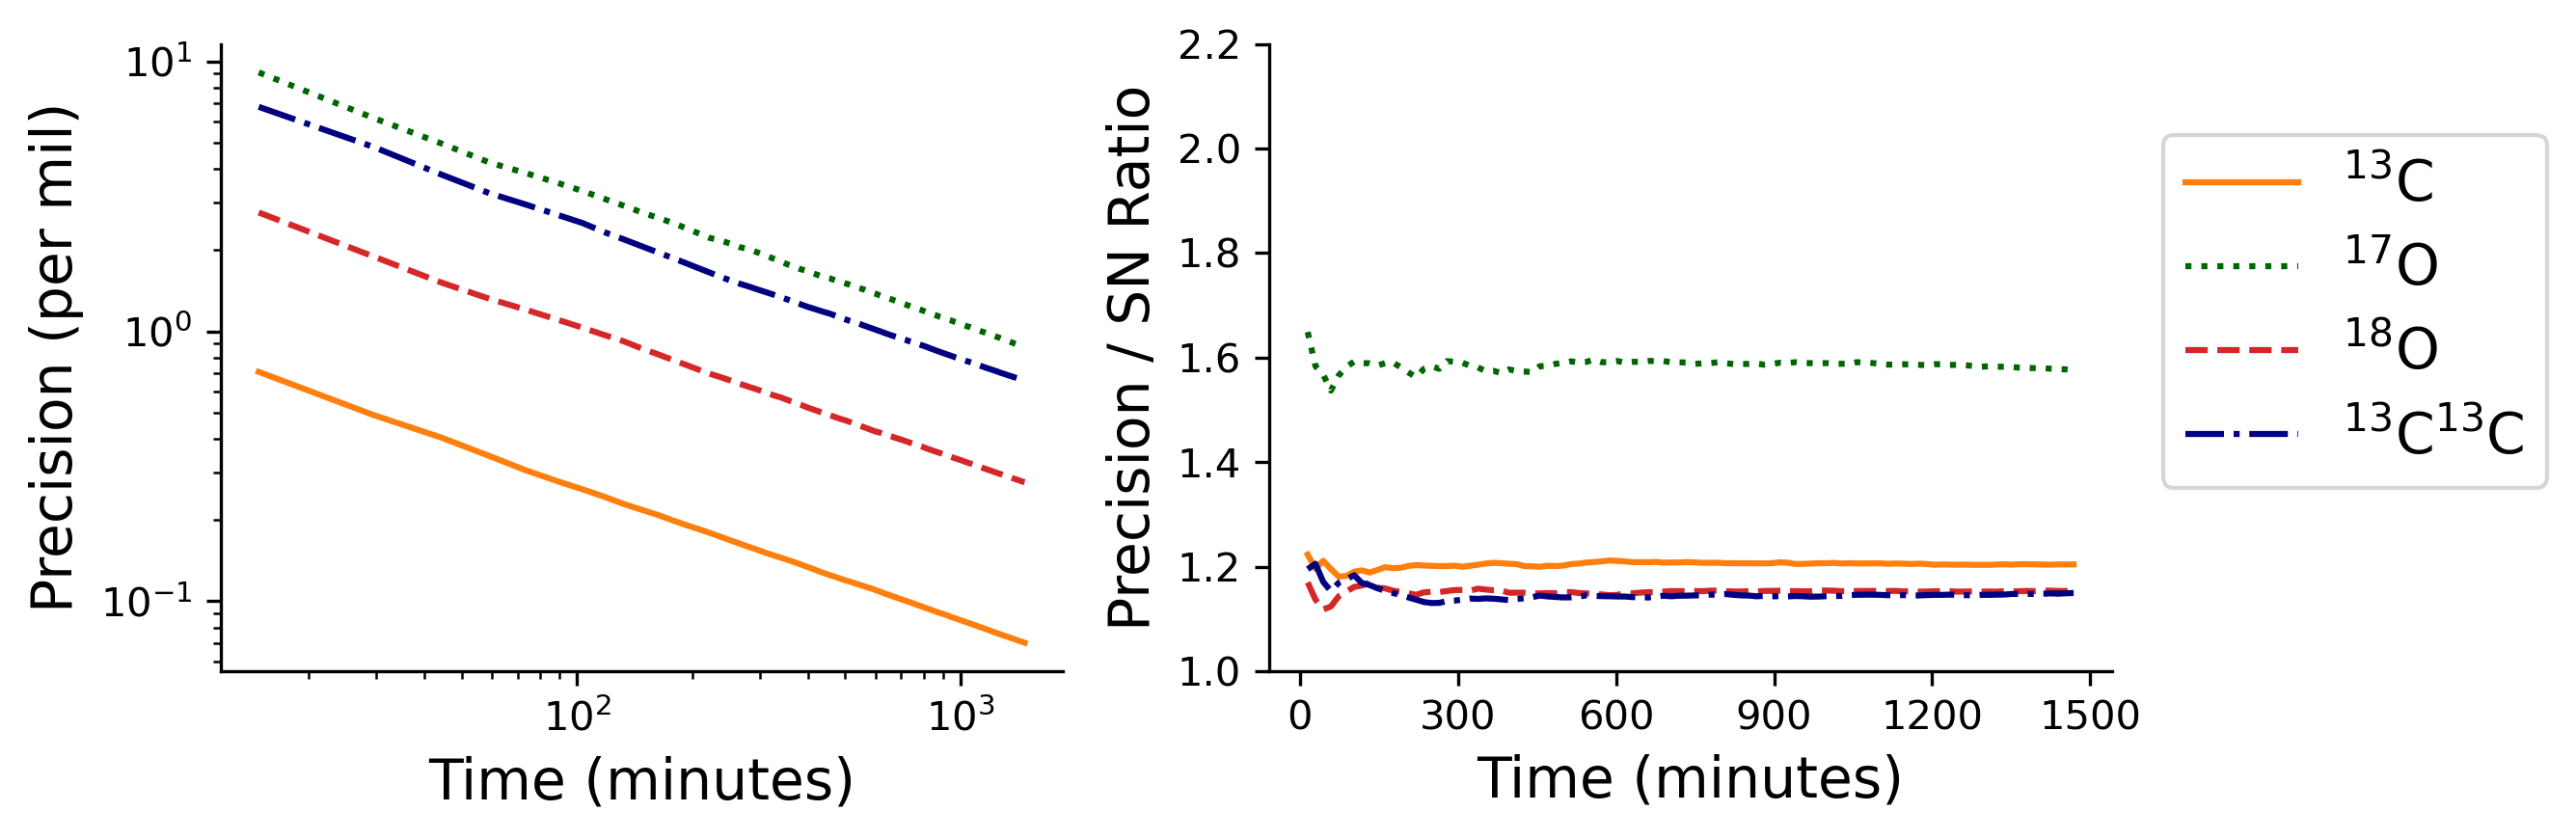

In [4]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9,3), dpi = 300)

markers = ['o','*','H']
colors = ['tab:orange','darkgreen','tab:red','navy']
labels = ["$^{13}$C",'$^{17}$O','$^{18}$O','$^{13}$C$^{13}$C']
linestyles = ['-',':','--','dashdot']

for rIdx, targetRat in enumerate(['13C/Unsub','17O/Unsub','18O/Unsub','13C-13C/Unsub']):
    sub1, sub2 = targetRat.split('/')

    series = fullDf[targetRat]
    l = len(series)

    nIter= 100
    l = len(series)
    means = []
    serrs = []
    nscans = []
    SN = []
    RSE = []
    predictedPrec = []
    times = []

    for i in tqdm(range(nIter)):
        maxscan = (i+1) * l //nIter


        current = fullDf[:maxscan]
        nscans.append(maxscan)

        cmean = current[sub1 + '/' + sub2].mean()
        cserr = current[sub1 + '/' + sub2].std() / np.sqrt(maxscan)
        Rserr = cserr / cmean
        RSE.append(Rserr)
        means.append(cmean)
        serrs.append(cserr)
        times.append(current['retTime'].max())

        cCounts18O = current['counts' + sub1].sum()
        cCounts34S = current['counts' + sub2].sum()

        cSN =  np.power((1./cCounts18O + 1./cCounts34S), 0.5)
        SN.append(cSN)


    #nIter = 15
    #1 iter = 97.207 minutes if nIter = 15
    cAx = axes[0]
    cAx.set_yscale("log", nonpositive='clip')
    cAx.set_xscale("log", nonpositive='clip')

    #cAx.scatter(range(1,len(RSE)+1), np.array(RSE)*1000, label = labels[rIdx], marker = markers[rIdx], 
    #            color = colors[rIdx])
    cAx.plot(times, np.array(RSE)*1000, label = labels[rIdx],
                color = colors[rIdx], linestyle = linestyles[rIdx])
    #cAx.scatter(range(1,len(SN)+1),np.array(SN)*1000,label = 'Shot Noise', marker = markers[rIdx], 
    #            facecolor = 'w',edgecolor= colors[rIdx])
    #cAx.legend()
    #ax.set_ylim(0.000,0.0002)
    xtickTargetsInMin = [0,300,600,900,1200,1500]
    #retTime per scan/scanNumber per iteration
    xtick = [x / (0.04378702 * fullDf['scanNumber'].max() / nIter)  for x in xtickTargetsInMin]
    xtickLab = [str(x) for x in xtickTargetsInMin]
    
    #cAx.set_xticks(xtick)
    #cAx.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    cAx.set_xlabel("Time (minutes)", fontsize = 14)
    cAx.set_ylabel("Precision (per mil)",fontsize = 14)

    sns.despine()

    cAx = axes[1]
    #cAx.set_xscale("log", nonpositive='clip')
    ratio = np.array(RSE)/np.array(SN)
    cAx.plot(range(1,len(ratio)+1),ratio, color = colors[rIdx], label = labels[rIdx], linestyle = linestyles[rIdx])
    cAx.set_ylabel("Precision / SN Ratio", fontsize = 14)
    cAx.set_xlabel("Time (minutes)", fontsize = 14)
    cAx.set_ylim(1,2.2)
    #cAx.hlines(2.0,0,15,color = 'tab:red',linestyle = '--', label = "Limit for Acceptable\n   Measurement")
    cAx.legend(loc = 'upper right', bbox_to_anchor=(1.55,0.9), fontsize = 14)
    cAx.set_xticks(xtick)
    cAx.set_xticklabels(xtickLab)
    sns.despine()

    plt.tight_layout()
    print(RSE[-1])

    fig.savefig("Shot Noise Limits Good Unsub Acetone.png", dpi = 900)

100%|██████████| 100/100 [00:00<00:00, 1284.99it/s]


7.015390345329086e-05


100%|██████████| 100/100 [00:00<00:00, 701.03it/s]


0.0011494531837760414


100%|██████████| 100/100 [00:00<00:00, 1392.07it/s]


0.0008716121080848687


100%|██████████| 100/100 [00:00<00:00, 1179.60it/s]


0.0002760622906485253


100%|██████████| 100/100 [00:00<00:00, 1319.34it/s]


0.0006560888168132305


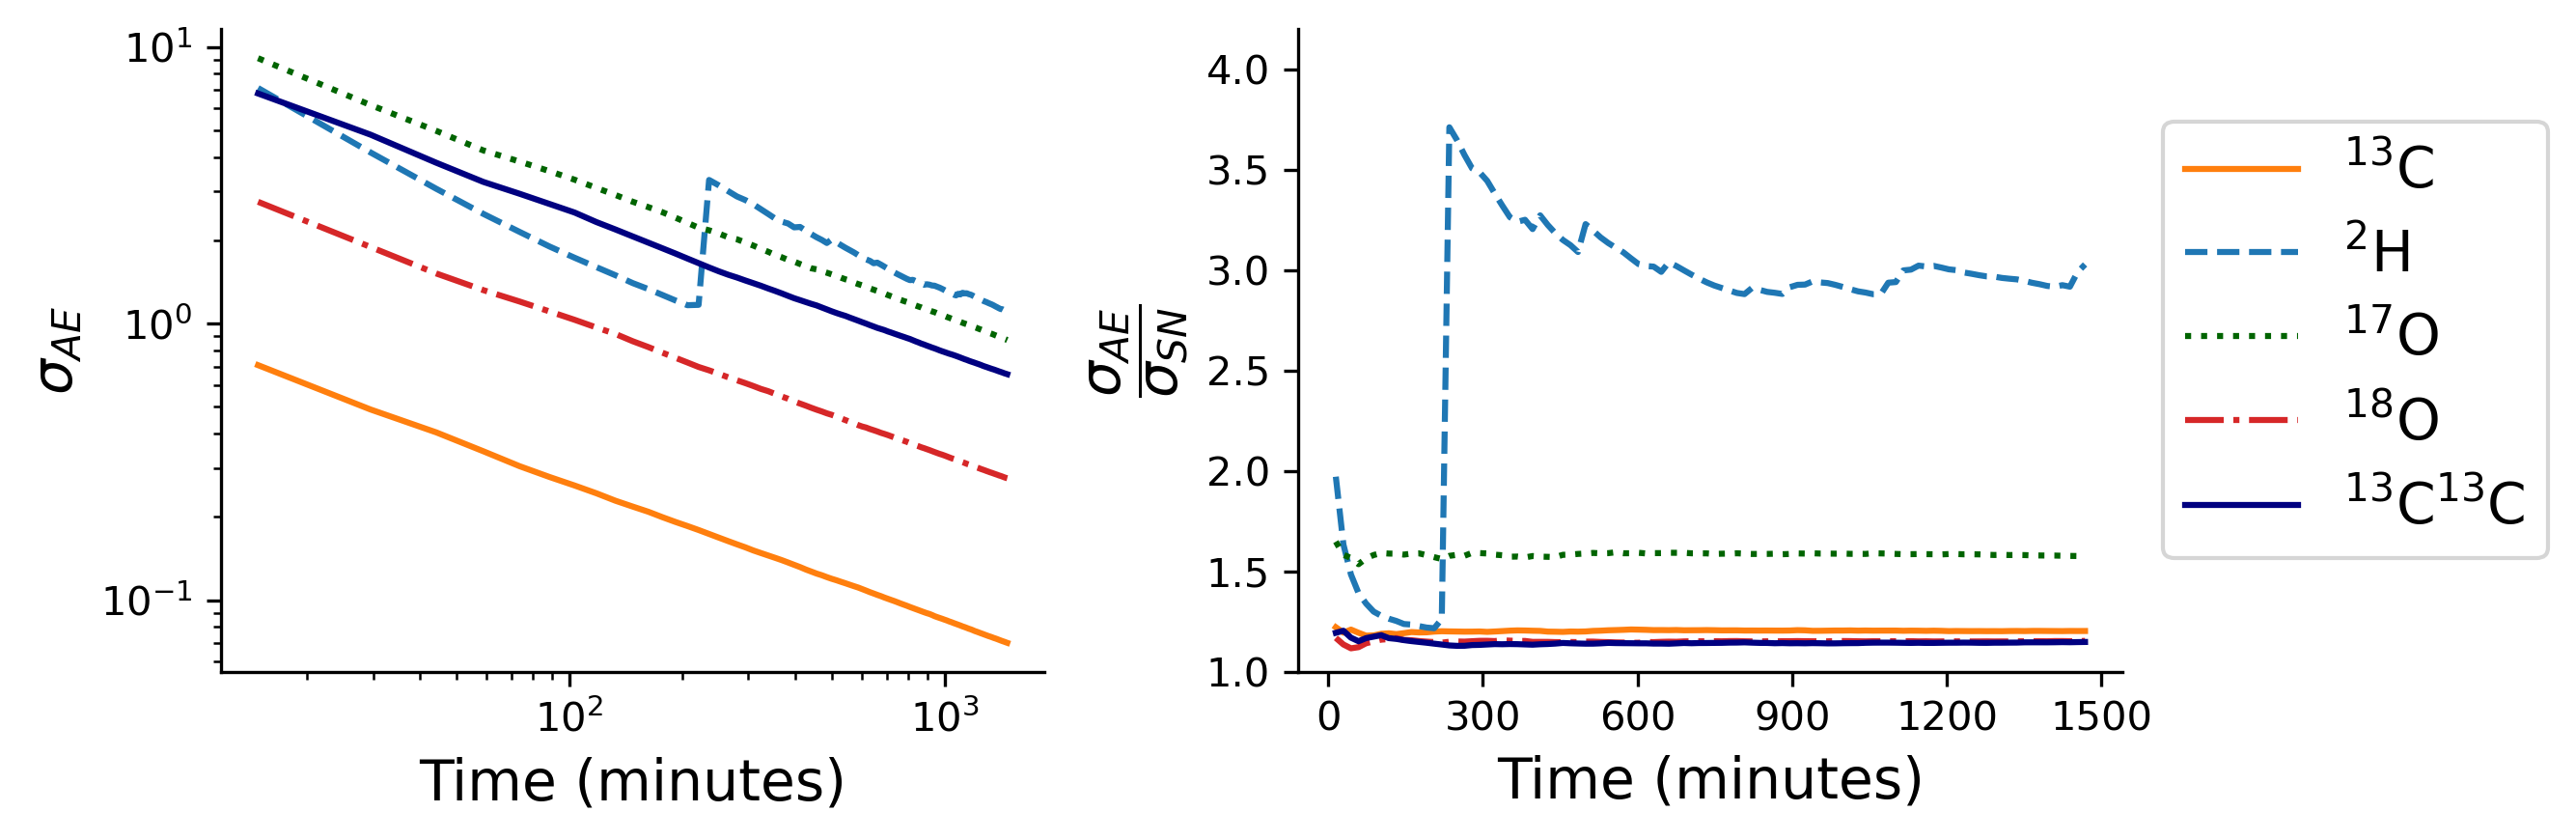

In [5]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9,3), dpi = 300)

markers = ['o','s','^','*','H']
colors = ['tab:orange','tab:blue','darkgreen','tab:red','navy']
labels = ["$^{13}$C",'$^{2}$H','$^{17}$O','$^{18}$O','$^{13}$C$^{13}$C']
linestyles = ['-','--',':','dashdot','-']

for rIdx, targetRat in enumerate(['13C/Unsub','D/Unsub','17O/Unsub','18O/Unsub','13C-13C/Unsub']):
    sub1, sub2 = targetRat.split('/')

    series = fullDf[targetRat]
    l = len(series)

    nIter= 100
    l = len(series)
    means = []
    serrs = []
    nscans = []
    SN = []
    RSE = []
    predictedPrec = []
    times = []

    for i in tqdm(range(nIter)):
        maxscan = (i+1) * l //nIter


        current = fullDf[:maxscan]
        nscans.append(maxscan)

        cmean = current[sub1 + '/' + sub2].mean()
        cserr = current[sub1 + '/' + sub2].std() / np.sqrt(maxscan)
        Rserr = cserr / cmean
        RSE.append(Rserr)
        means.append(cmean)
        serrs.append(cserr)
        times.append(current['retTime'].max())

        cCounts18O = current['counts' + sub1].sum()
        cCounts34S = current['counts' + sub2].sum()

        cSN =  np.power((1./cCounts18O + 1./cCounts34S), 0.5)
        SN.append(cSN)


    #nIter = 15
    #1 iter = 97.207 minutes if nIter = 15
    cAx = axes[0]
    cAx.set_yscale("log", nonpositive='clip')
    cAx.set_xscale("log", nonpositive='clip')

    #cAx.scatter(range(1,len(RSE)+1), np.array(RSE)*1000, label = labels[rIdx], marker = markers[rIdx], 
    #            color = colors[rIdx])
    cAx.plot(times, np.array(RSE)*1000, label = labels[rIdx],
                color = colors[rIdx], linestyle = linestyles[rIdx])
    #cAx.scatter(range(1,len(SN)+1),np.array(SN)*1000,label = 'Shot Noise', marker = markers[rIdx], 
    #            facecolor = 'w',edgecolor= colors[rIdx])
    #cAx.legend()
    #ax.set_ylim(0.000,0.0002)
    xtickTargetsInMin = [0,300,600,900,1200,1500]
    #retTime per scan/scanNumber per iteration
    xtick = [x / (0.04378702 * fullDf['scanNumber'].max() / nIter)  for x in xtickTargetsInMin]
    xtickLab = [str(x) for x in xtickTargetsInMin]
    
    #cAx.set_xticks(xtick)
    #cAx.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    cAx.set_xlabel("Time (minutes)", fontsize = 14)
    cAx.set_ylabel("$\sigma_{AE}$",fontsize = 14)

    sns.despine()

    cAx = axes[1]
    #cAx.set_xscale("log", nonpositive='clip')
    ratio = np.array(RSE)/np.array(SN)
    cAx.plot(range(1,len(ratio)+1),ratio, color = colors[rIdx], label = labels[rIdx], linestyle = linestyles[rIdx])
    cAx.set_ylabel(r'$\dfrac{\sigma_{AE}}{\sigma_{SN}}$', fontsize = 14)
    cAx.set_xlabel("Time (minutes)", fontsize = 14)
    cAx.set_ylim(1,4.2)
    #cAx.hlines(2.0,0,15,color = 'tab:red',linestyle = '--', label = "Limit for Acceptable\n   Measurement")
    cAx.legend(loc = 'upper right', bbox_to_anchor=(1.55,0.9), fontsize = 14)
    cAx.set_xticks(xtick)
    cAx.set_xticklabels(xtickLab)
    sns.despine()

    plt.tight_layout()
    print(RSE[-1])

    fig.savefig("Shot Noise Limits All Unsub Acetone.png", dpi = 600)

In [19]:
bounds = np.linspace(0,fullDf['retTime'].max(),8)

sliceList = []
for i in range(len(bounds)-1):
    thisSlice = fullDf[fullDf['retTime'].between(bounds[i], bounds[i+1], inclusive='neither')]
    sliceList.append(thisSlice)

In [36]:
ratList = ['13C/Unsub','17O/Unsub','18O/Unsub','13C-13C/Unsub','D/Unsub']
outputDict = {}
replicateNames = ['Std 1','Smp 1','Std 2','Smp 2','Std 3','Smp 3','Std 4']

for sliceIdx, slice in enumerate(sliceList):
    repName = replicateNames[sliceIdx]
    for ratKey in ratList:
        if ratKey not in outputDict:
            outputDict[ratKey] = {'Mean':[],'SE':[],'RSE':[]}

        outputDict[ratKey]['Mean'].append(slice[ratKey].mean())
        StErr = slice[ratKey].std() /  np.sqrt(len(slice[ratKey]))
        outputDict[ratKey]['SE'].append(StErr)
        outputDict[ratKey]['RSE'].append(StErr / slice[ratKey].mean())


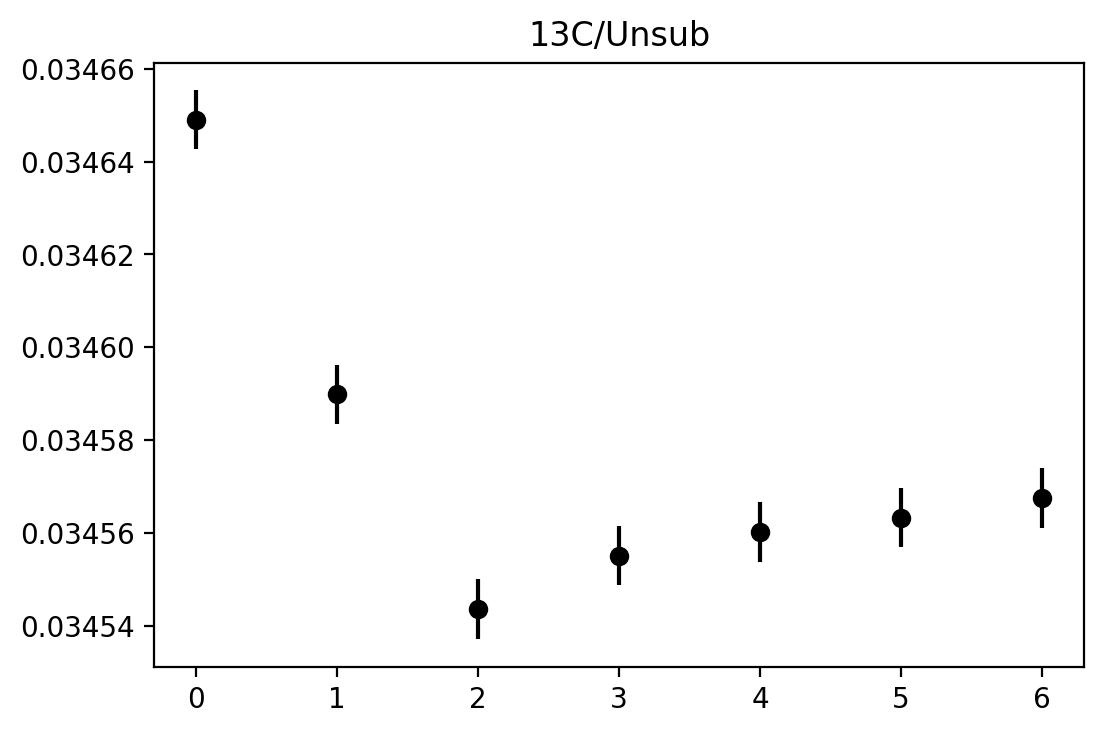

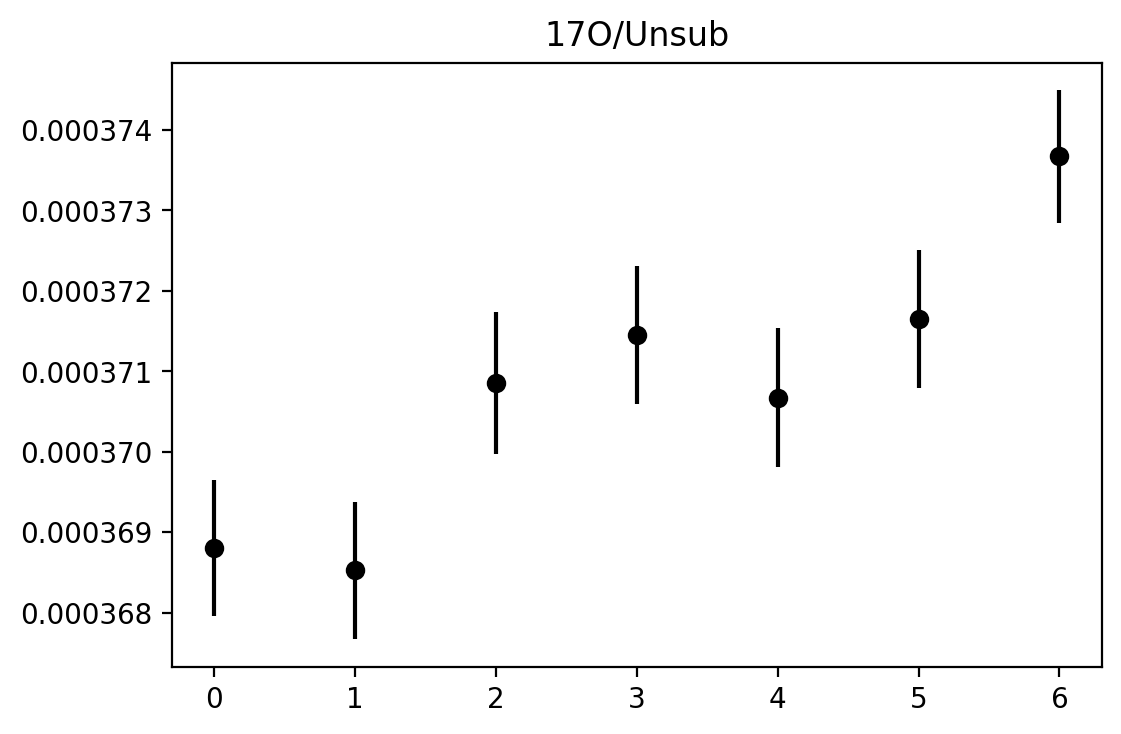

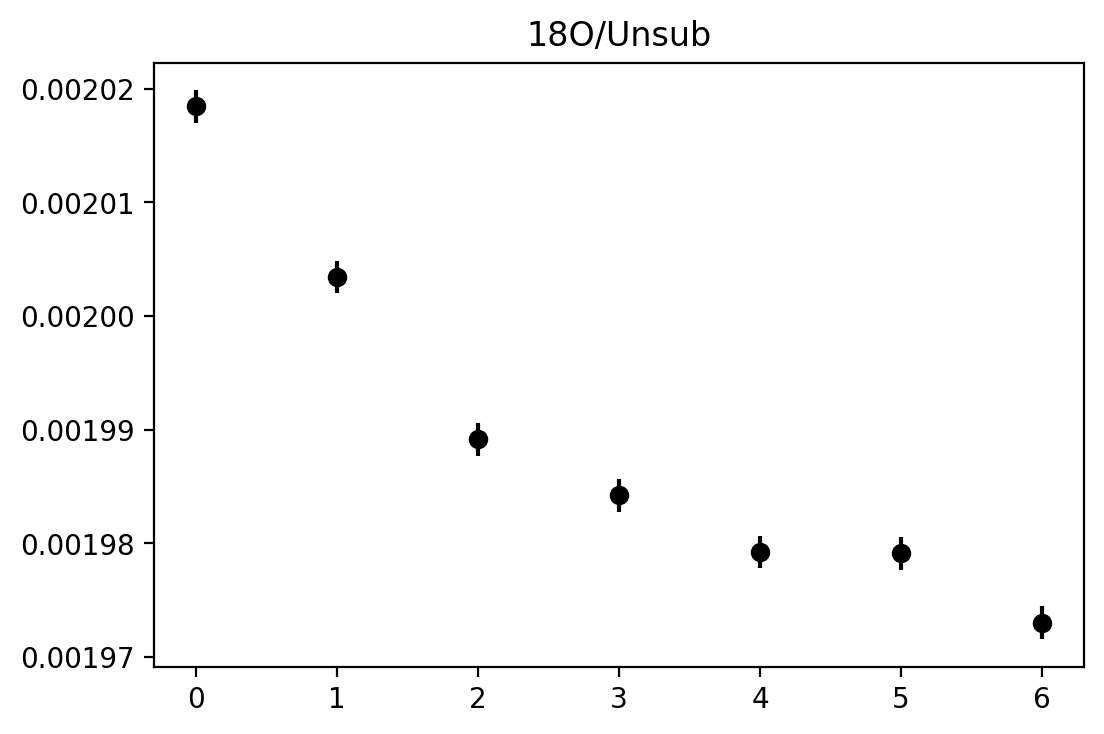

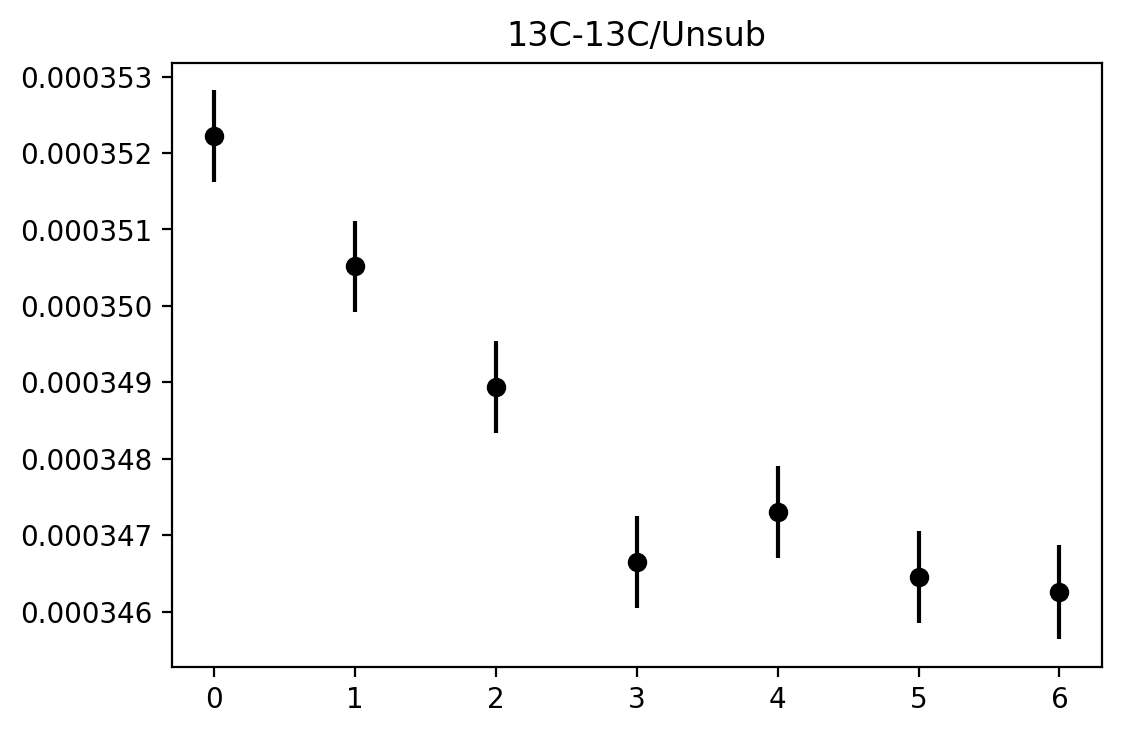

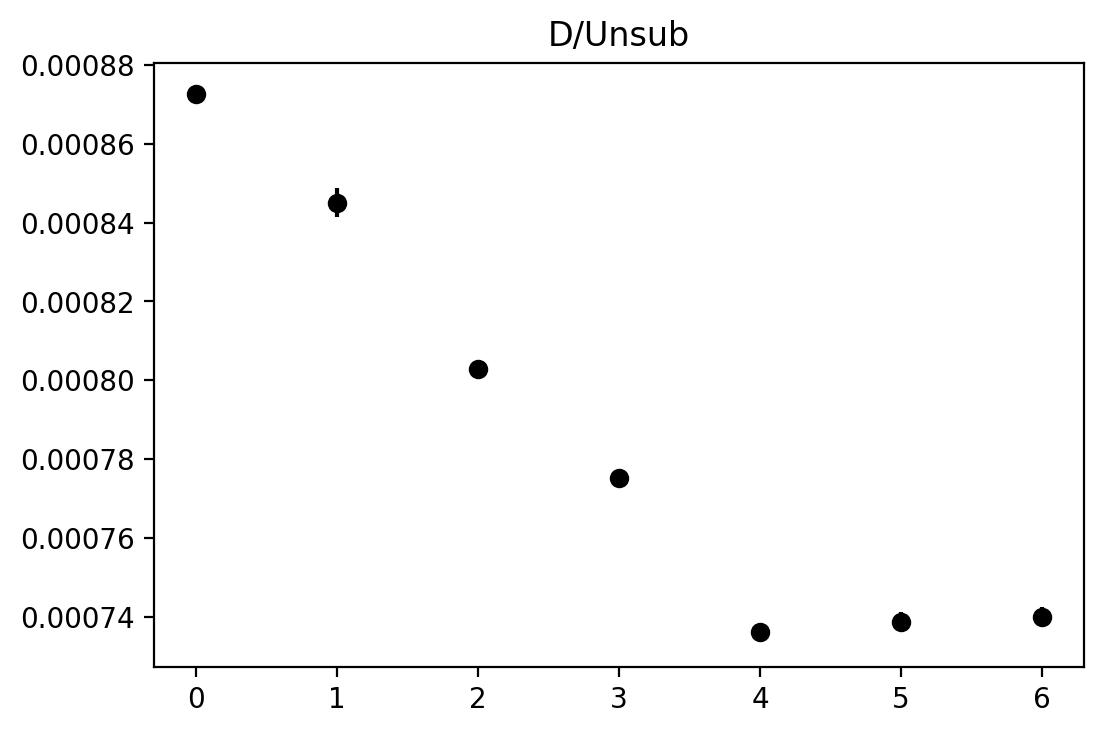

In [38]:
for ratKey, ratData in outputDict.items():
    fig, ax = plt.subplots(nrows = 1, ncols = 1, dpi = 200)
    ax.errorbar(range(7),ratData['Mean'],ratData['SE'], fmt = 'o', c = 'k')
    plt.title(ratKey)

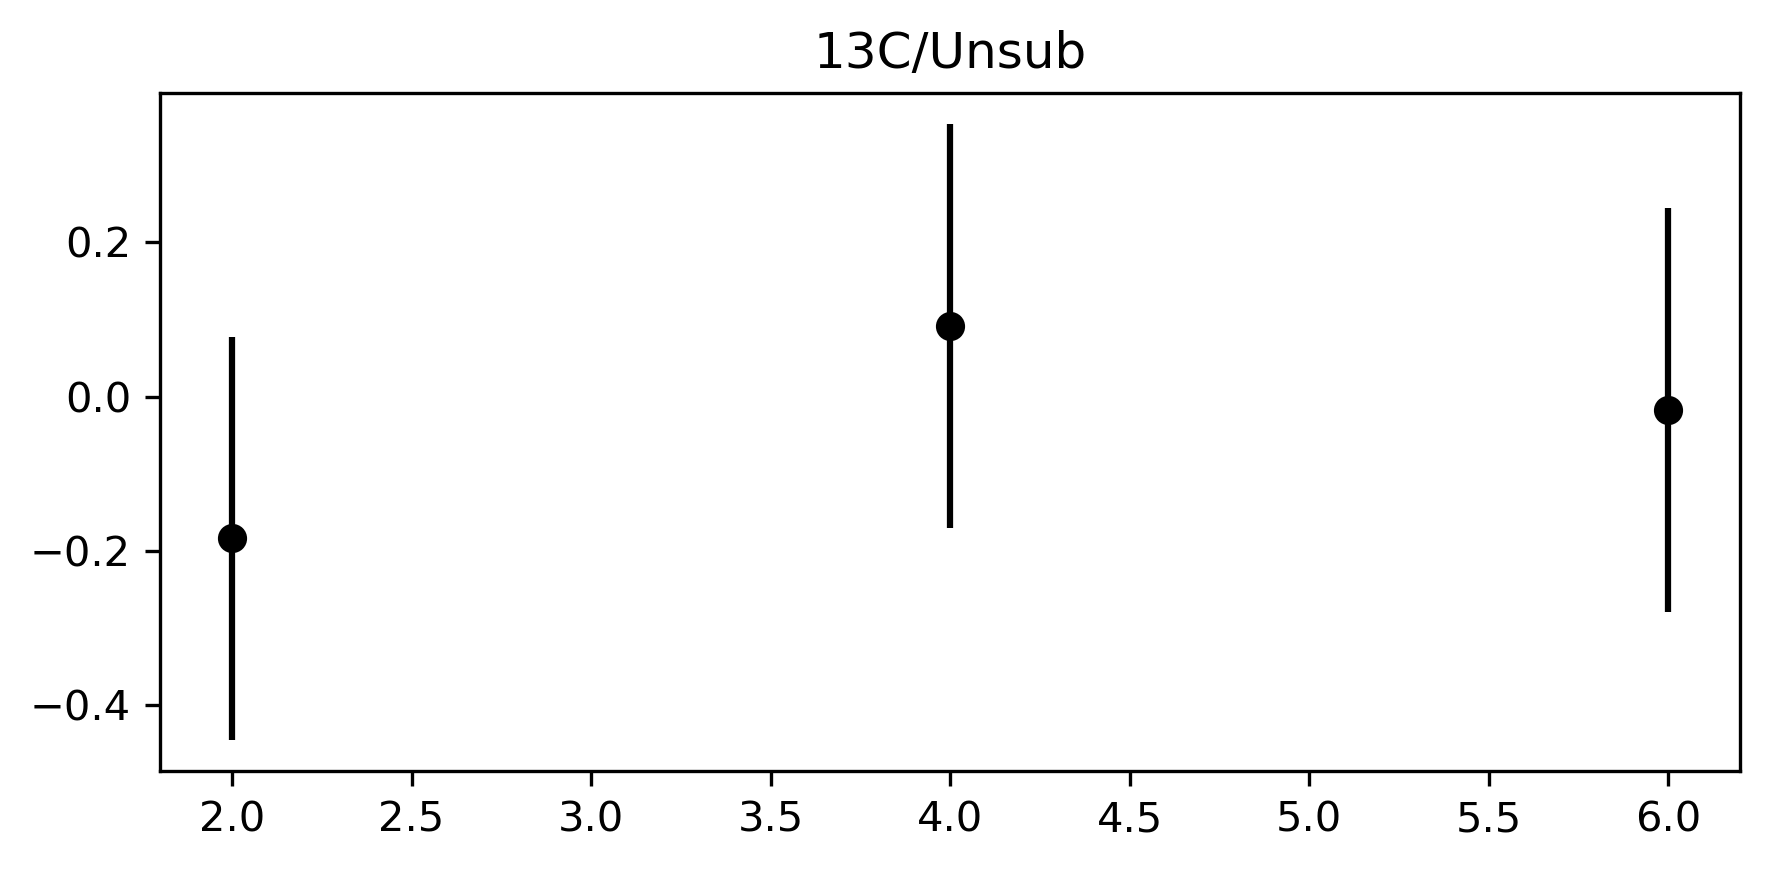

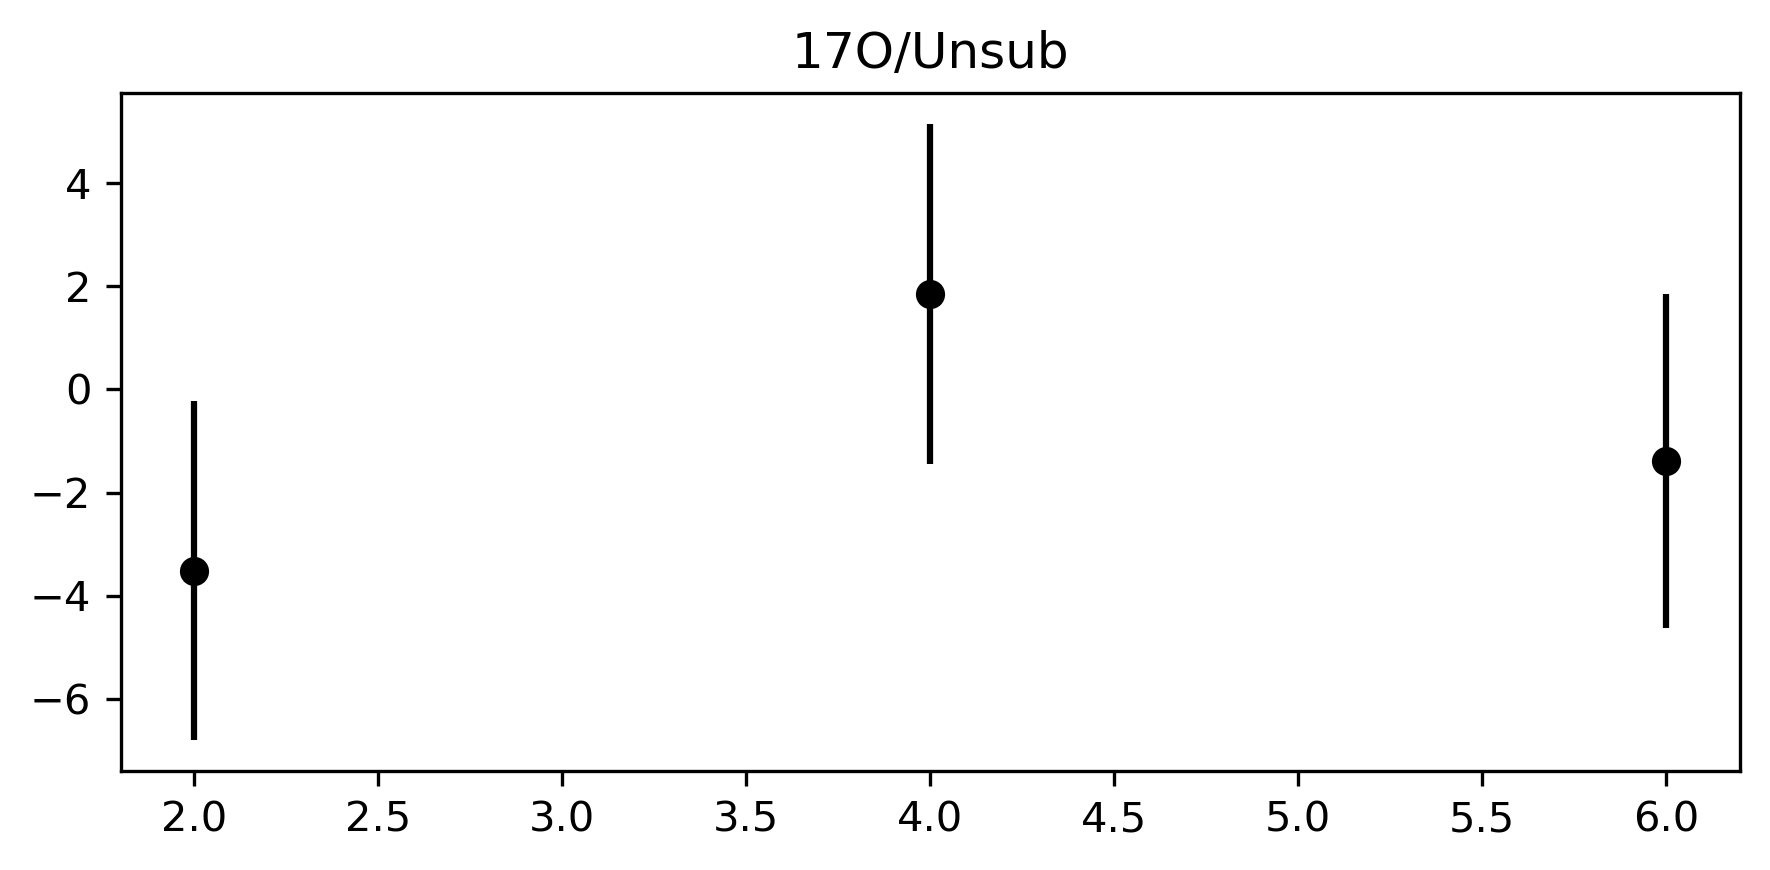

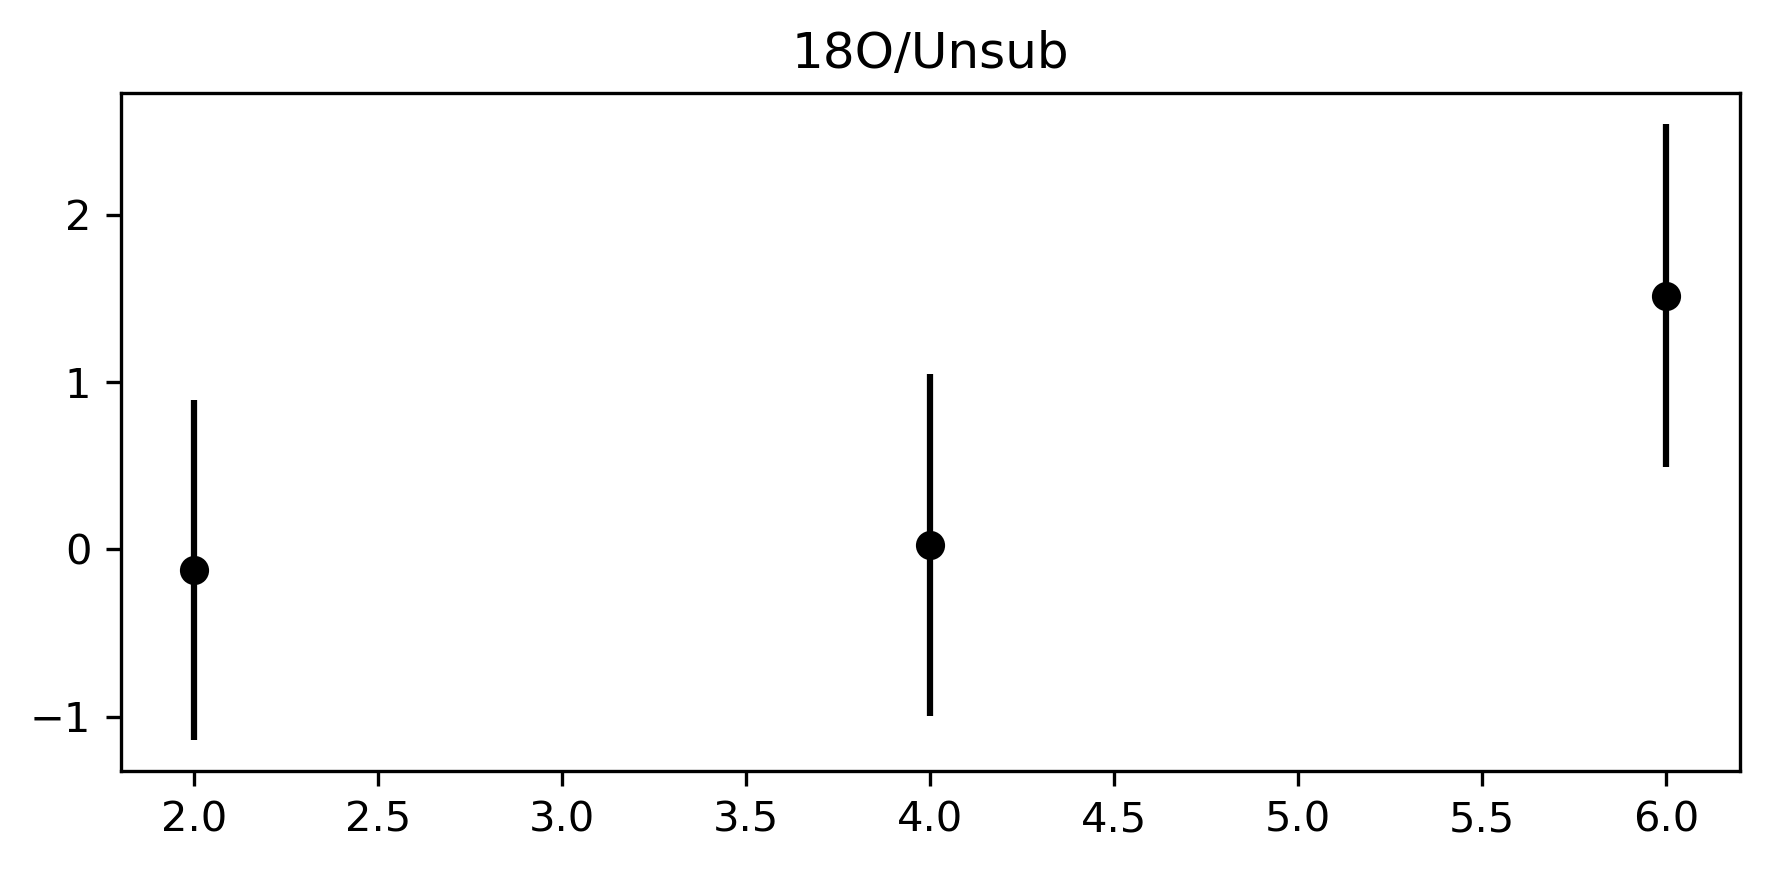

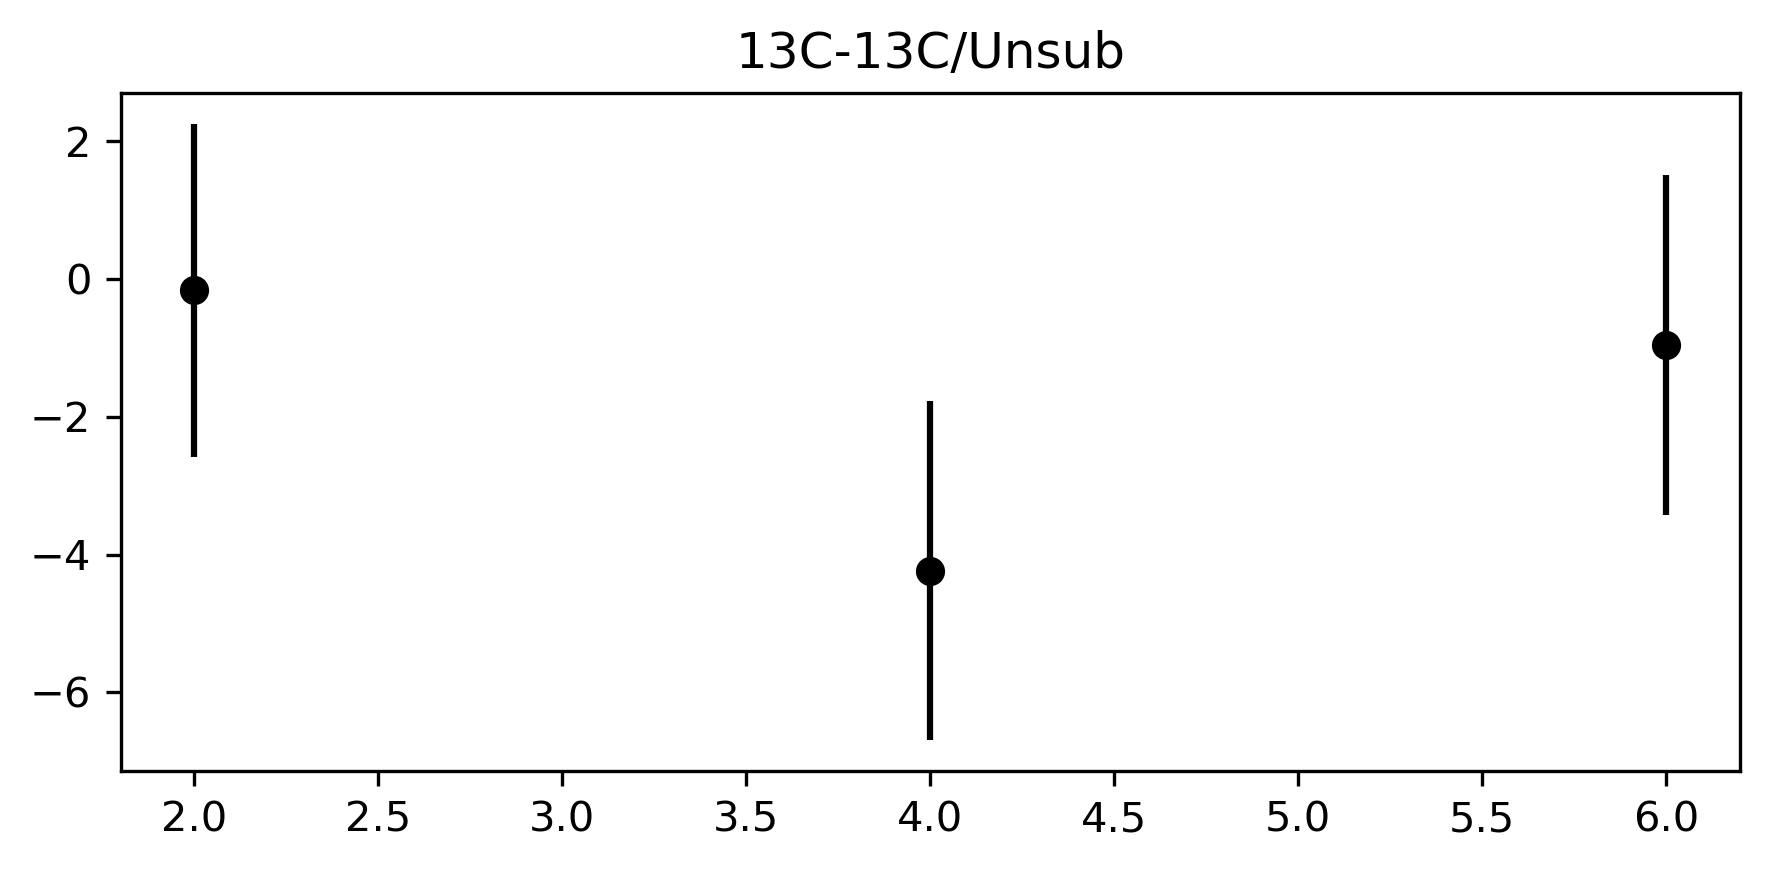

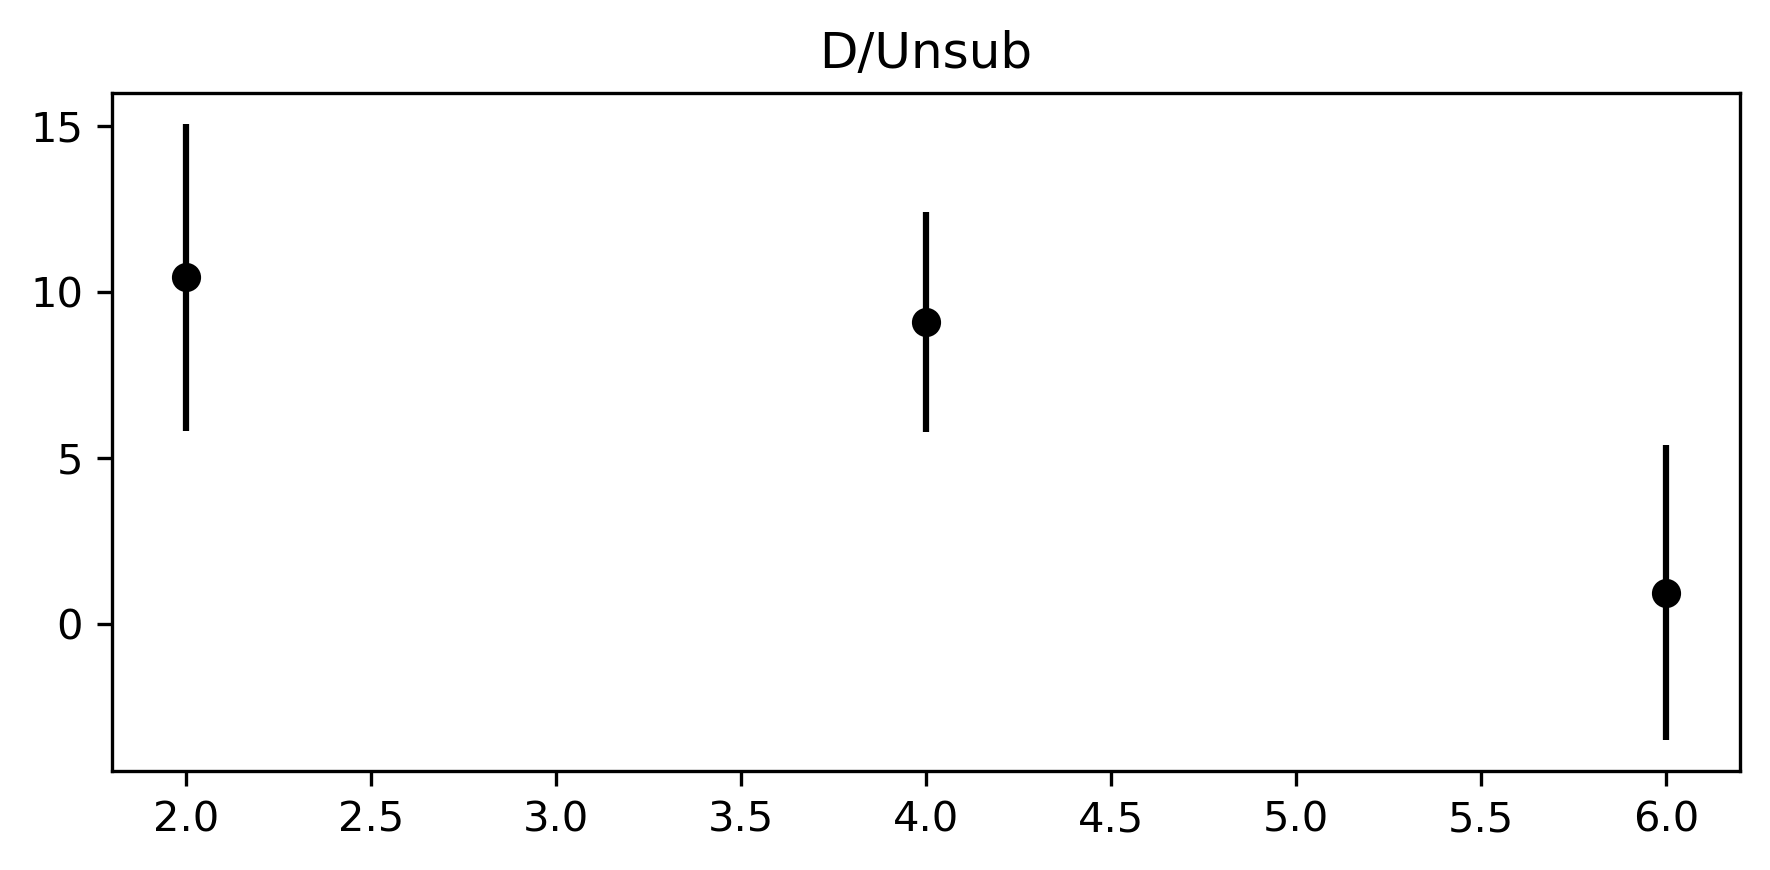

In [41]:
standardizedOutput = {}

for ratIdx, (ratioKey, ratioData) in enumerate(outputDict.items()):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,3), dpi = 300)
    if ratioKey not in standardizedOutput:
        standardizedOutput[ratioKey] = {'Ratio':[],'RSE':[]}
    for fileNumber in range(7):
        if fileNumber in [1,3,5]:
            smpStdOne = outputDict[ratioKey]['Mean'][fileNumber] / outputDict[ratioKey]['Mean'][fileNumber - 1]
            smpStdTwo = outputDict[ratioKey]['Mean'][fileNumber] / outputDict[ratioKey]['Mean'][fileNumber + 1]
            avgSmpStdCompare = (smpStdOne + smpStdTwo) / 2

            RSEOne = outputDict[ratioKey]['RSE'][fileNumber - 1]
            RSETwo = outputDict[ratioKey]['RSE'][fileNumber + 1]
            RSESmp = outputDict[ratioKey]['RSE'][fileNumber]

            avgStdRSE = (RSEOne + RSETwo) / 2

            errQuad = np.sqrt(RSESmp**2+avgStdRSE**2)

            deltaComp = 1000 * (avgSmpStdCompare - 1)
            deltaRSE = errQuad * 1000
            ax.errorbar(fileNumber + 1, deltaComp,deltaRSE, fmt = 'o', c = 'k')

            standardizedOutput[ratioKey]['Ratio'].append(avgSmpStdCompare)
            standardizedOutput[ratioKey]['RSE'].append(errQuad)
    plt.title(ratioKey)
    plt.tight_layout()
    plt.show()
    

In [35]:
standardizedOutput

{'13C/Unsub': {'Ratio': [0.9998161681992546,
   1.0000912094850838,
   0.999982308646845],
  'RSE': [0.00026129961441969627,
   0.0002621450038933543,
   0.0002619595599248856]}}